In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 한글 지원
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf" 
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [29]:
df = pd.read_csv('C:/Users/sja95/OneDrive/바탕 화면/dataset/건강검진2017.csv', encoding = 'euc-KR')

df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [30]:
df = df[['성별코드','연령대코드(5세단위)','신장(5Cm단위)','체중(5Kg단위)','허리둘레','흡연상태','음주여부','이완기혈압']]
df.columns = ['sex','age','ht','wt','waist','smoking','alcohol','dbp']

In [31]:
df = df.dropna(axis = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999090 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   sex      999090 non-null  int64  
 1   age      999090 non-null  int64  
 2   ht       999090 non-null  int64  
 3   wt       999090 non-null  int64  
 4   waist    999090 non-null  float64
 5   smoking  999090 non-null  float64
 6   alcohol  999090 non-null  object 
 7   dbp      999090 non-null  float64
dtypes: float64(3), int64(4), object(1)
memory usage: 68.6+ MB


In [32]:
df['bmi'] = df['wt'] / ((df['ht']/100)**2)

In [33]:
df['absi'] = (df['waist']*0.393701) /( (df['bmi']**0.6666) * ((df['ht']/100)**0.5) )
df = df.round(decimals = 2)

df.head()

,sex,age,ht,wt,waist,smoking,alcohol,dbp,bmi,absi
0,1,8,170,75,90.0,1.0,Y,80.0,25.95,3.10
1,1,7,180,80,89.0,3.0,N,82.0,24.69,3.08
2,1,9,165,75,91.0,1.0,N,70.0,27.55,3.06
3,1,11,175,80,91.0,1.0,N,87.0,26.12,3.08
4,1,11,165,60,80.0,1.0,N,82.0,22.04,3.12


In [34]:
df.loc[(df.alcohol=='Y'),'alcohol'] = 1.0
df.loc[(df.alcohol=='N'), 'alcohol'] = 0.0

df = df.astype(float)

In [35]:
# dbp 이상치 판단

q25, q75 = np.quantile(df['dbp'], 0.25), np.quantile(df['dbp'], 0.75)

IQR = q75 - q25

# outlier 계산

lower = q25 - IQR*3
upper = q75 + IQR*3

print(lower, upper)

34.0 118.0


In [36]:
# ht
#df.drop(df.loc[(df['ht']>215.0)|(df['ht']<110.0)].index, inplace = True)

# wt
#df.drop(df.loc[(df['wt']>115.0)|(df['wt']<10.0)].index, inplace = True)

# bmi
#df.drop(df.loc[(df['bmi']>39.36)|(df['bmi']<8.07)].index, inplace = True)

# waist
df.drop(df.loc[((df['waist']>128.9)|(df['waist']<32.9))].index, inplace = True)

# absi
df.drop(df.loc[((df['absi']>3.94)|(df['absi']<2.12))].index, inplace = True)

# dbp
#df.drop(df.loc[(df['dbp']>118.0)|(df['dbp']<34.0)].index, inplace = True)

# EDA

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998402 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   sex      998402 non-null  float64
 1   age      998402 non-null  float64
 2   ht       998402 non-null  float64
 3   wt       998402 non-null  float64
 4   waist    998402 non-null  float64
 5   smoking  998402 non-null  float64
 6   alcohol  998402 non-null  float64
 7   dbp      998402 non-null  float64
 8   bmi      998402 non-null  float64
 9   absi     998402 non-null  float64
dtypes: float64(10)
memory usage: 83.8 MB


## 1) 성별

- 남성이 여성보다 비교적 수치가 높음

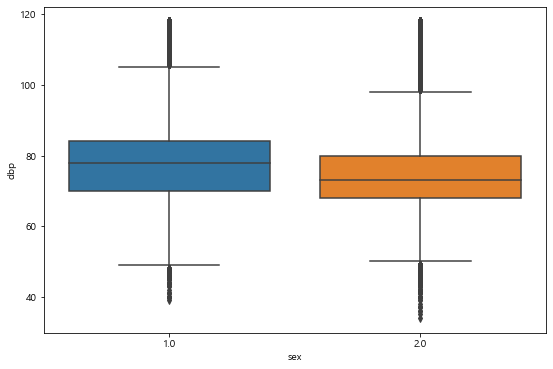

In [16]:
plt.figure(figsize = (9,6))
sns.boxplot(x = 'sex', y = 'dbp', data = df)
plt.show()

## 2) 나이

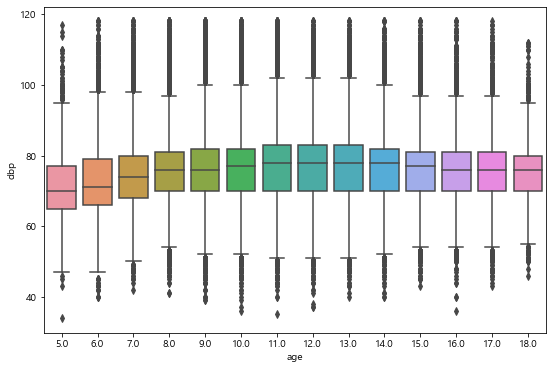

In [17]:
plt.figure(figsize = (9,6))
sns.boxplot(x = 'age', y = 'dbp', data = df)
plt.show()

## 3) 키

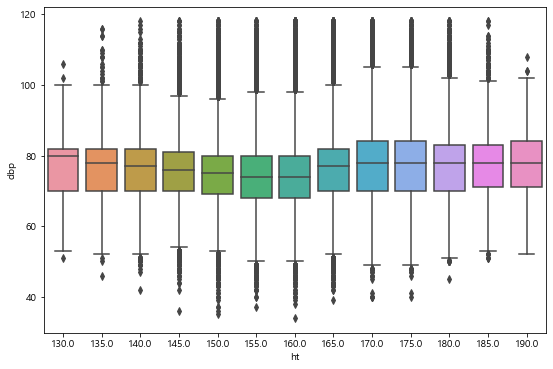

In [19]:
plt.figure(figsize = (9,6))
sns.boxplot(x = 'ht', y = 'dbp', data = df)
plt.show()

## 4) 체중

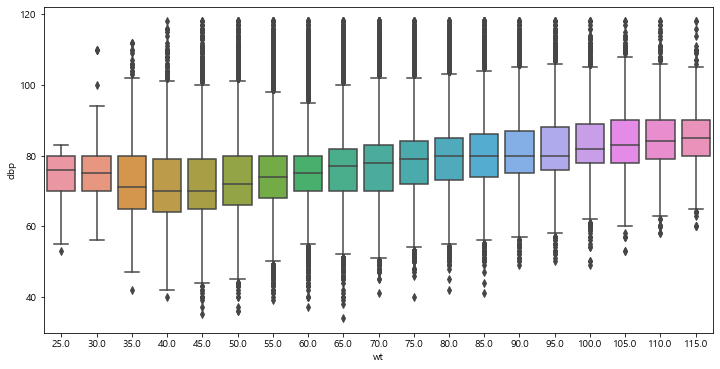

In [21]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'wt', y = 'dbp', data = df)
plt.show()

## 5) bmi 

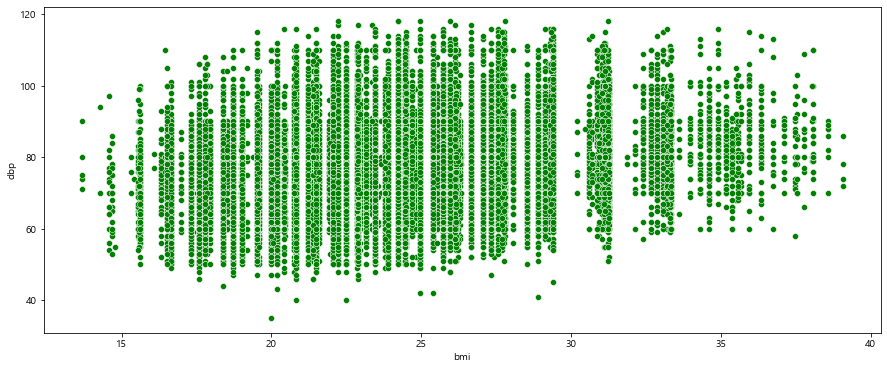

In [31]:
df_sample = df.sample(n=100000, random_state = 2045)

plt.figure(figsize = (15,6))
sns.scatterplot(df_sample.bmi, df_sample.dbp, color = 'g')
plt.show()

## 6) 허리둘레

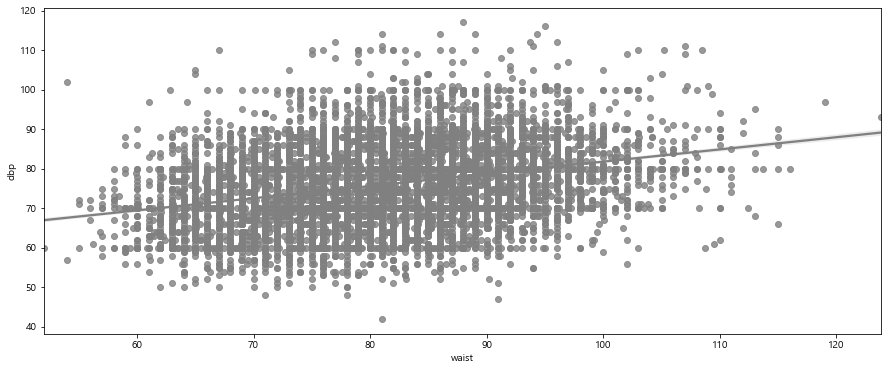

In [36]:
df_sample = df.sample(n=10000, random_state = 2045)

plt.figure(figsize = (15,6))
sns.regplot(df_sample.waist, df_sample.dbp, color = 'gray')
plt.show()

## 7) absi - 체형지수

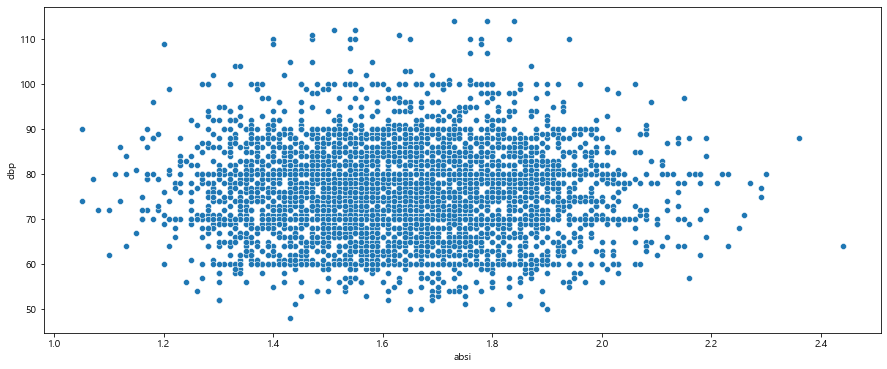

In [41]:
df_sample = df.sample(n=5000, random_state = 2045)


plt.figure(figsize = (15,6))
sns.scatterplot(df_sample.absi, df_sample.dbp)
plt.show()

## 8) 음주여부

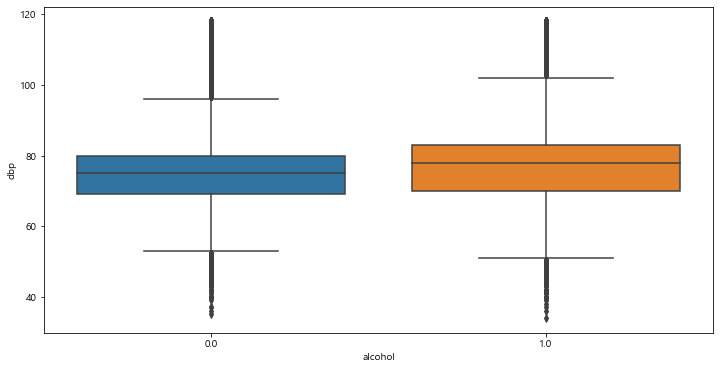

In [43]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'alcohol', y = 'dbp', data = df)
plt.show()

## 9) 흡연상태

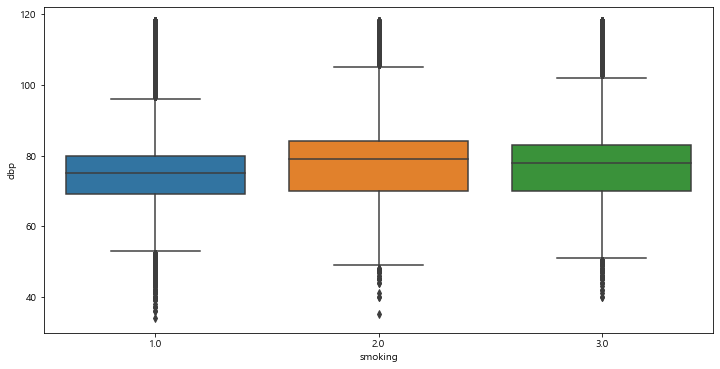

In [44]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'smoking', y = 'dbp', data = df)
plt.show()

## 10) dbp 이완기 혈압 분포

count    998402.000000
mean         76.052900
std           9.893413
min          30.000000
25%          70.000000
50%          76.000000
75%          82.000000
max         185.000000
Name: dbp, dtype: float64


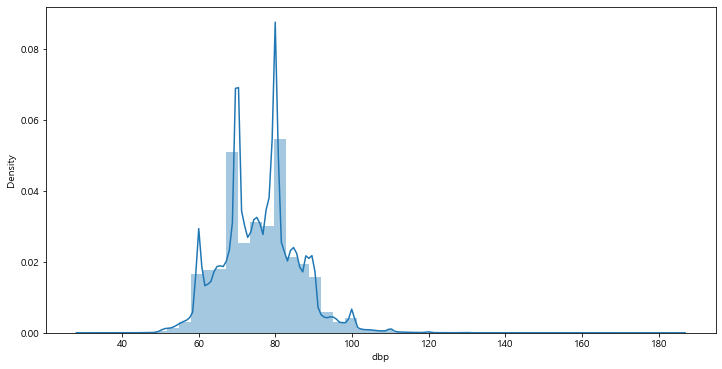

In [38]:
print(df.dbp.describe())
plt.figure(figsize = (12,6))
sns.distplot(df.dbp, hist = True, kde = True)
plt.show()